In [1]:
import pandas as pd
import altair as alt
from datetime import datetime, timedelta
import re
import july
import matplotlib

In [2]:
# importing data
dfa = pd.read_csv("../data/McLeod.csv")

,country,DATE,PAPER,HEADLINE,TONE,SUMMARY,Quotation doc?,ANALYSIS,OFFENSE,NOTES,LINK,SAME AS...?,Date
0,Australia,21 March 1890,Evening News,WATER.,factual,Constable Blackburn on his way to NZ to extrad...,FALSE,NaN,bigamy,NaN,http://nla.gov.au/nla.news-article108799724,NaN,1890-03-21
1,Australia,21 March 1890,The Australian Star,"M'LEOD, M.D., D.D. Two Warrants Out. Back From...",satirical,"""May"" (error) Cameron has issued warrant for a...",TRUE,NaN,"bigamy, criminal assault",NaN,http://nla.gov.au/nla.news-article230620621,NaN,1890-03-21
2,Australia,22 March 1890,The Australian Star,"M'LEOD, M.D., D.D. Two Warrants Out.",satirical,"""May"" (error) Cameron has issued warrant for a...",FALSE,NaN,"bigamy, criminal assault",NaN,\nhttp://nla.gov.au/nla.news-article230611457\n,"21 March 1890, The Australian Star, 'M'Leod, M...",1890-03-22
3,Australia,22 March 1890,The North West Post,"NEW SOUTH WALES. SYDNEY, March 21.",factual,Dr McLeod arrested in NZ,FALSE,NaN,"bigamy, criminal assault",NaN,http://nla.gov.au/nla.news-article198890050,NaN,1890-03-22
4,Australia,22 March 1890,Barrier Miner,"A Fashionable Bigamist. SYDNEY, Saturday.",factual,McLeod arrested in NZ for 'a serious offence u...,FALSE,NaN,"attempted rape (implied), bigamy",mentions the 'serious offence upon a girl' fir...,http://nla.gov.au/nla.news-article44048607,NaN,1890-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,New_Zealand,21 July 1919,New Zealand Times,CRIME OF BIGAMY,factual,summary of legal debate and reference to M'Leo...,no,NaN,bigamy,NaN,https://paperspast.natlib.govt.nz/newspapers/N...,NaN,1919-07-21
835,New_Zealand,22 July 1919,Wanganui Chronicle,IS BIGAMY A CRIME?,factual,summary of legal debate and reference to M'Leo...,no,NaN,bigamy,NaN,https://paperspast.natlib.govt.nz/newspapers/W...,NaN,1919-07-22
836,New_Zealand,31 July 1919,Evening Star,THE LAW OF BIGAMY,factual,lengthy account of judges' decision that bigam...,yes,NaN,bigamy,NaN,https://paperspast.natlib.govt.nz/newspapers/E...,NaN,1919-07-31
837,New_Zealand,29 March 1920,Evening Star,"The Evening Star MONDAY, MARCH 29, 1920.",factual,"summarising legal argument from July 1919, the...",no,NaN,bigamy,NaN,\nhttps://paperspast.natlib.govt.nz/newspapers...,NaN,1920-03-29


In [8]:
# filter to only have dates before 1892, since that's where the bulk of them are
dfa = dfa[dfa['Date']<='1891-12-31']

In [13]:
dfa['Total'] = 1

<ipython-input-13-740dcada1ef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Total'] = 1


In [15]:
dfa.columns

Index(['country', 'DATE', 'PAPER', 'HEADLINE', 'TONE', 'SUMMARY',
       'Quotation doc?', 'ANALYSIS', 'OFFENSE', 'NOTES', 'LINK', 'SAME AS...?',
       'Date', 'Total'],
      dtype='object')

In [27]:
# group by date
dfa['ddate']=pd.to_datetime(dfa['Date'])
df = dfa.groupby(by=dfa['ddate'].dt.date).size().reset_index(name='count')
#dfa.groupby(dfa.datetime.floor('d')).size().reset_index(name='count')

<ipython-input-27-743d2fa4ffa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['ddate']=pd.to_datetime(dfa['Date'])


In [49]:
bins = [0, 1, 5, 10, 25, 50]
df['binned'] = pd.cut(df['count'], bins)
print (df)

          ddate  count    binned
0    1890-03-19     12  (10, 25]
1    1890-03-20      5    (1, 5]
2    1890-03-21      5    (1, 5]
3    1890-03-22      6   (5, 10]
4    1890-03-24      1    (0, 1]
..          ...    ...       ...
138  1891-10-23      2    (1, 5]
139  1891-10-24      4    (1, 5]
140  1891-12-04      1    (0, 1]
141  1891-12-12      2    (1, 5]
142  1891-12-31      1    (0, 1]

[143 rows x 3 columns]


In [51]:
# bin the counts
bins = [0, 1, 5, 10, 25, 50]
labels = [1,2,3,4,5]
df['binned'] = pd.cut(df['count'], bins, labels=labels)
print (df)

          ddate  count binned
0    1890-03-19     12      4
1    1890-03-20      5      2
2    1890-03-21      5      2
3    1890-03-22      6      3
4    1890-03-24      1      1
..          ...    ...    ...
138  1891-10-23      2      2
139  1891-10-24      4      2
140  1891-12-04      1      1
141  1891-12-12      2      2
142  1891-12-31      1      1

[143 rows x 3 columns]


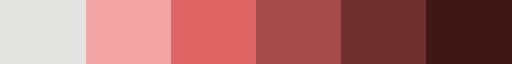

In [62]:
matplotlib.colors.ListedColormap(['#e3e3e1','#f2a5a2','#e06666','#a64a4a','#702f2f','#3e1717']) 

<AxesSubplot:title={'center':'All Newspapers'}>

<AxesSubplot:title={'center':'All Newspapers'}>

<AxesSubplot:title={'center':'All Newspapers'}>

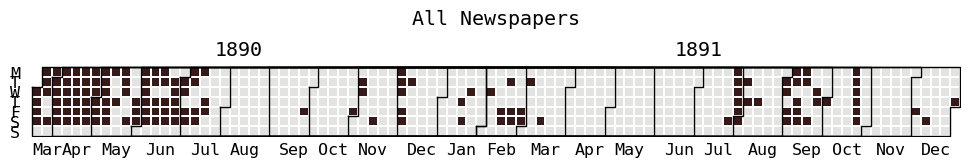

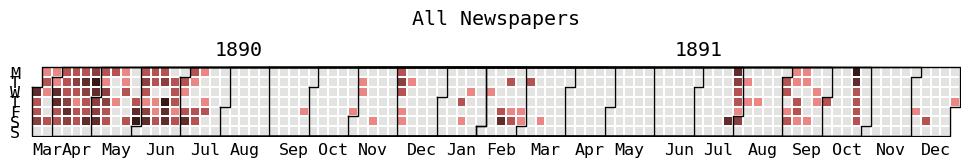

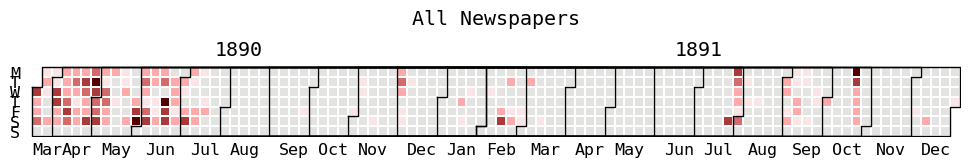

In [77]:
# setting colour
#f2f2ed
#d1d1ce
#e3e3e1

# red e06666
#colall = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#e06666']) #0,1
colall = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#e3e3e1','#ea8684','#b55353','#8b3f3f','#602c2c','#361919']) #0,1
#colb = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#e3e3e1','#f2a5a2','#e06666','#a64a4a','#702f2f','#3e1717']) #0,1
#colb = matplotlib.colors.ListedColormap(['#e3e3e1','#f2a5a2','#e06666','#a64a4a','#702f2f','#270c0c']) 
#colb = matplotlib.colors.ListedColormap(['#e3e3e1','#f2a5a2','gold','orange','red','darkred']) 
colb = matplotlib.colors.ListedColormap(['#e3e3e1','#f9e5e5','#ffaaaa','#d46a6a','#aa3939','#550000']) 

# plot

display(july.heatmap(dfa.Date, dfa['Total'],month_grid=True, cmap=colall, title='All Newspapers'))
display(july.heatmap(df.ddate, df['binned'], month_grid=True, cmap=colall, title='All Newspapers'))
display(july.heatmap(df.ddate, df['binned'], month_grid=True, cmap=colb, title='All Newspapers'))


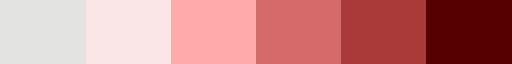

In [78]:
colb

In [59]:
# some cleaning and filtering by date
dfa = pd.read_csv("ETHEL HARRIS - article count.csv")
dfa.drop(130, inplace=True)
dfa['DATE'] = pd.to_datetime(dfa['DATE'], format='%m/%d/%Y')
dfa = dfa[dfa['DATE']<'1911-4-1']


# setting into binary
# I know there must be an easier way, maybe with lapply, but this was faster for me to just do since its onl 5 rows
# rather than spending longer figuring out the faster way
dfa.loc[dfa['Daily News']>0,'Daily News'] = 1
dfa.loc[dfa['Kalgoorlie Miner']>0,'Kalgoorlie Miner'] = 1
dfa.loc[dfa['Kalgoorlie Miner']>0,'Kalgoorlie Miner'] = 1
dfa.loc[dfa['Sunday Times']>0,'Sunday Times'] = 1
dfa.loc[dfa['The West Australian']>0,'The West Australian'] = 1
dfa.loc[dfa['Total']>0,'Total'] = 1

# remove times when Sunday Times has one when not on Sunday
dfa = dfa.set_index('DATE')
dfa.loc[dfa.index.dayofweek != 6,'Sunday Times'] = 0
dfa.reset_index(inplace=True)


# setting colours
colall = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#e06666']) #0,1
coldaily = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#f6b26b'])
colkal = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#93c47d'])
colsun = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#6fa8dc'])
colwest = matplotlib.colors.LinearSegmentedColormap.from_list('', ['lightgray','#8e7cc3'])

# the plots! :)
display(july.heatmap(dfa.DATE, dfa['Total'],month_grid=True, cmap=colall, title='All 4 Newspapers'))
display(july.heatmap(dfa.DATE, dfa.iloc[:,1],month_grid=True, cmap=coldaily, title = '$Daily\ News$'))
display(july.heatmap(dfa.DATE, dfa.iloc[:,2],month_grid=True, cmap=colkal, title = '$Kalgoorlie\ Miner$'))
display(july.heatmap(dfa.DATE, dfa.iloc[:,3],month_grid=True, cmap=colsun, title = '$Sunday\ Times$'))
display(july.heatmap(dfa.DATE, dfa.iloc[:,4],month_grid=True, cmap=colwest, title = '$The\ West\ Australian$'))

FileNotFoundError: [Errno 2] No such file or directory: 'ETHEL HARRIS - article count.csv'

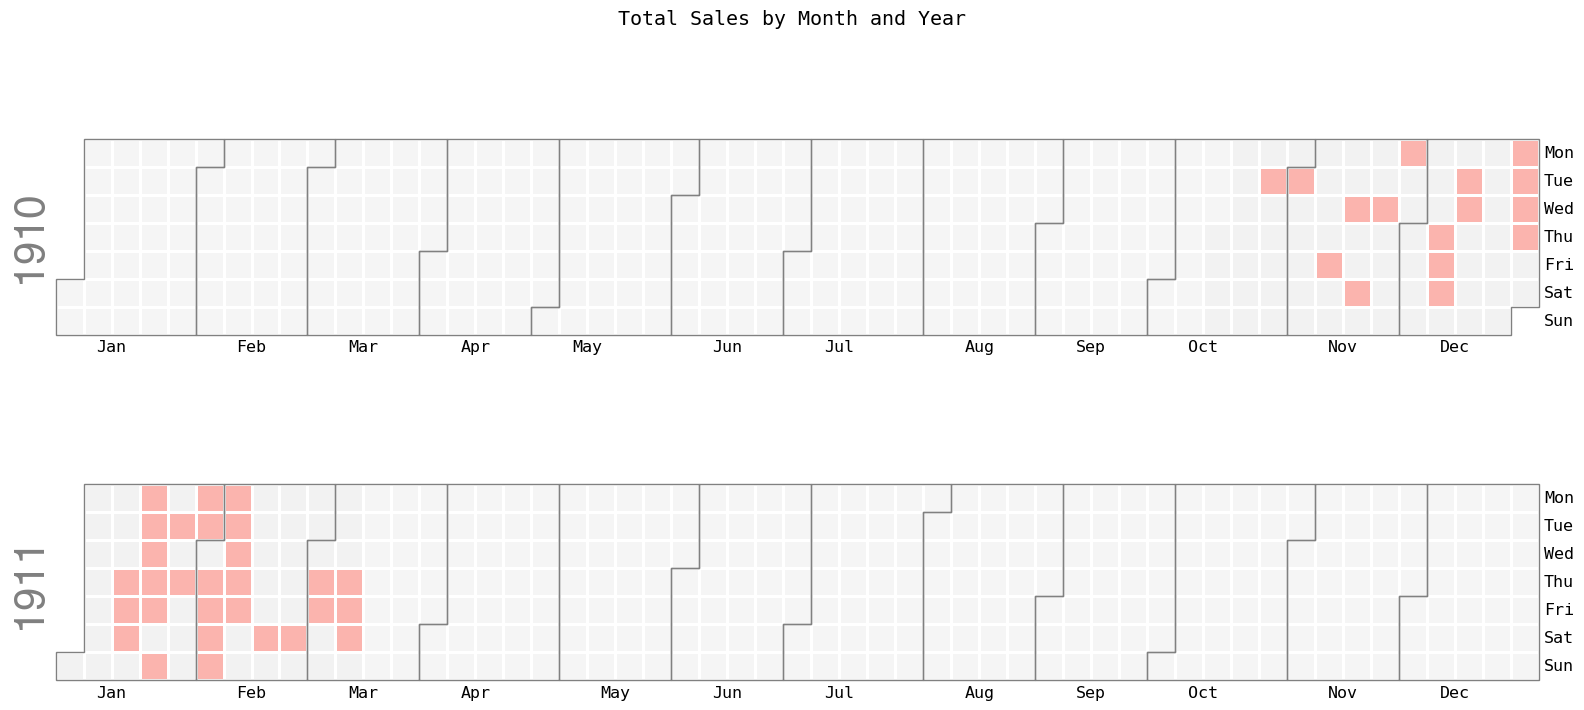

In [198]:
#### EXPLORATION I DIDN'T USE
# exploring using full dataset
df = pd.read_csv("ETHEL HARRIS - Sheet10.csv", parse_dates=True)
df = df.iloc[:,[0,2]]

# some cleaning
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df.loc[df['PAPER'].str.contains('Kalgoor'),'PAPER'] = 'Kalgoorlie Miner'
df.loc[df['PAPER'].str.contains('Daily'), 'PAPER'] = 'Daily News'


# was going to try to find when there's 0 with NAs
drange = pd.date_range('1910-10-13','1911-4-1', freq='D')
dfrange = drange.to_frame(index=False)
dfrange.rename(columns={0:'DATE'}, inplace=True)
fulldf = pd.merge(dfrange, df, how='outer')


# tick plot
tick = alt.Chart(df[df['DATE']<'1911-4-1'],title=alt.TitleParams(
    text = "Case mentionned essentially daily in peak!",
    subtitle = "Ethel guy essentially 'tried by the public'",
    anchor = 'start'
)).mark_tick().encode(
    alt.X('DATE', title = ''),
    alt.Y('PAPER', title=None),
    alt.Color('PAPER', legend=None)
).properties(height = 100).configure_title(fontSize=20).configure_axis(titleFontSize=12)
tick

# altair heatmap
alt.Chart(df[df['DATE']<'1911-4-1']).mark_rect().encode(
    alt.X('yearmonthdate(DATE):O'),
    alt.Y('PAPER'),
    alt.Color('count()')
)


# setting index, didn't end up needing
dfb = dfa.set_index('DATE')

# trying out calplot
import calplot
pl1 = calplot.calplot(data = dfb['Total'], cmap = 'Pastel1',
                      figsize = (16, 8), suptitle = "Total Sales by Month and Year")

Source where I got plot inspiration

https://12ft.io/proxy?q=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fcalendar-heatmaps-a-perfect-way-to-display-your-time-series-quantitative-data-ad36bf81a3ed